# Imports

In [16]:
using CSV
using DataFrames
using Plots

---
# Introduction to Optimization | Assignment #1
# Juan Pablo Gutiérrez Restrepo `(jgutierrezre)`

---
## 1. Related to the nature of the data. Which conditions should matrices $A$ and $b$ meet to be solvable from the least squares perspective?

The only condition that has to be met is that the columns of matrix $A$ must be linearly independent. This is to ensure that $A^TA$ is invertible. Once this is guaranteed, the process goes as follows: Computing the matrix $A^TA$ and the vector $A^Tb$ and solving the equation $A^TAx=A^Tb$.

Now, why doesn't $b$ need to meet any condition? Because the previous equation is always consistent. And even if the results are not pretty, they exist.

---
## 2. Use least squares for non-linear models to adjust the Bitcoin price and perform a prediction using these to determine the future daily price a week ahead. Compare with the actual values.

We first open the whole Bitcoin Price History dataset, this shows the slow, but explosive, rise of its value.

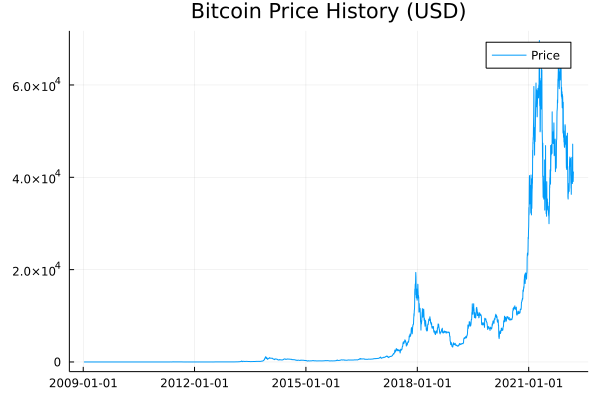

In [17]:
df = CSV.read("data/Bitcoin.csv", DataFrame);
plot(df.Date, df.Price, title="Bitcoin Price History (USD)", label="Price")

Nevertheless, trying to fit simple polymials to such a range could cause accuracy problems, as it obviously has not been stable (and that is implying it currently is) since its inception. So the models will be fitted to a shorter range, in our case, the last 2 years.

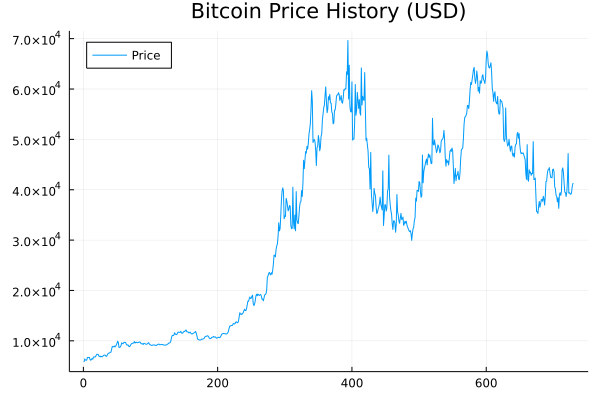

In [18]:
# Variables
dfr = last(df, 730) # Dataframe with which to adjust the model. In this case, the dataframe representing the last 730 days or 2 years.;
plot(dfr.Price, title="Bitcoin Price History (USD)", label="Price", legend=:topleft)

In [19]:
# Constants
n = nrow(dfr) # Number of values
xVals = Array(1:n) # Array of dates as a range of values.
yVals = dfr.Price # Array of prices.;

The code is comprised of a loop that goes as follows: It loops through multiple degrees of polynomials, and for each degree it solves for the vector that minimizes the error. The maximum degree is set to 6, as 7 starts misbehaving due to possible floating point accuracy problems.

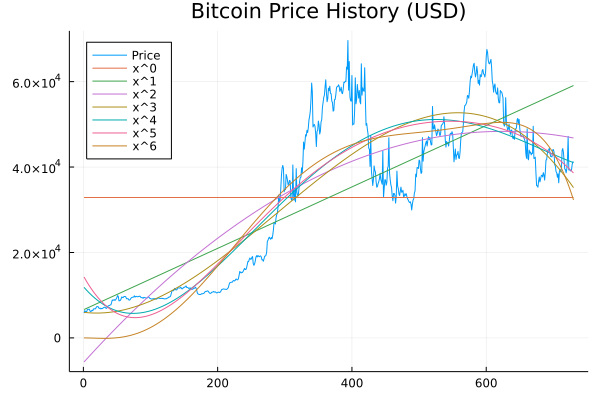

In [20]:
# Initiazed Arrays
yEst = []
ynwEst = []

# Main Loop
for degree in 0:6
    A = [xVals[i]^j for i in 1:n, j in 0:degree] # Design Matrix.
    xHat = A\yVals # Approximate Solution.
    
    yHat(x, degree) = xHat'*[x^i for i in 0:degree] # Price approximation function.
    push!(yEst, yHat.(1:n, degree)) # Approximate price values.
    push!(ynwEst, yHat.(n+1:n+7, degree)) # Approximate price values for the following week.
end

# Graphing
plot!(yEst[1:7], label = reshape(["x^$n" for n in 0:6], 1, :))

---

Now that we got our models, we can start comparing the values predicted for the current week to the actual values.

First, we read the values for the current week.

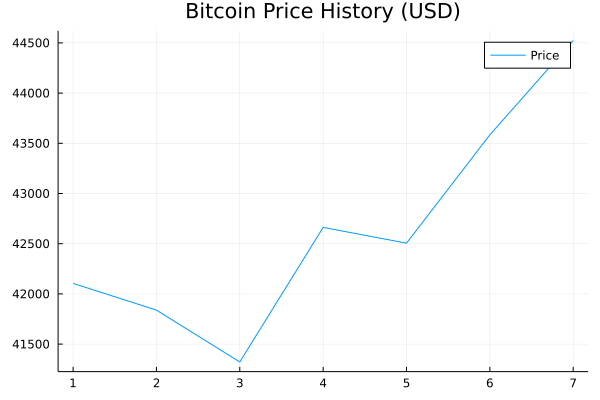

In [21]:
dfnw = CSV.read("data/Bitcoin_next.csv", DataFrame);
plot(dfnw.Price, title="Bitcoin Price History (USD)", label="Price")

Then, we plot the values predicted by each of the models.

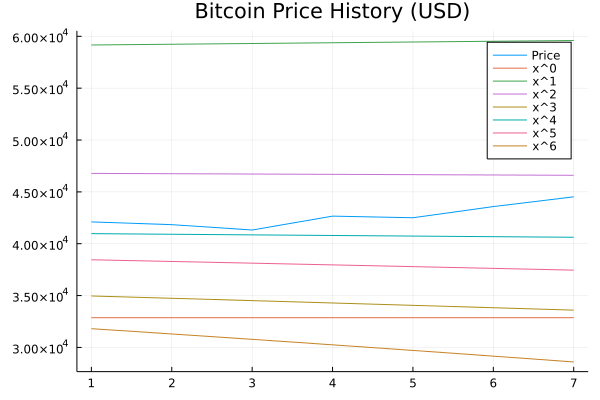

In [22]:
plot!(ynwEst[1:7], label = reshape(["x^$n" for n in 0:6], 1, :))

As we can see, none of the models seem to correctfully predict the prices of Bitcoin. With the closest one ($x^5$) getting as close as 1,000 USD to the actual values, but then moving away to being almost 5,000 USD off. Nevertheless, this was expected as it is impossibly unlikely that Bitcoin (or anything market speculation related) follows a simple (<=6 degrees) non-linear model.

---
## 3. Use least squares to determine the relationship between the price of Bitcoin and the prices of three commodities, namely oil, silver, and gold, during the last year.

This time, we will only consider the price of Bitcon during the last year.

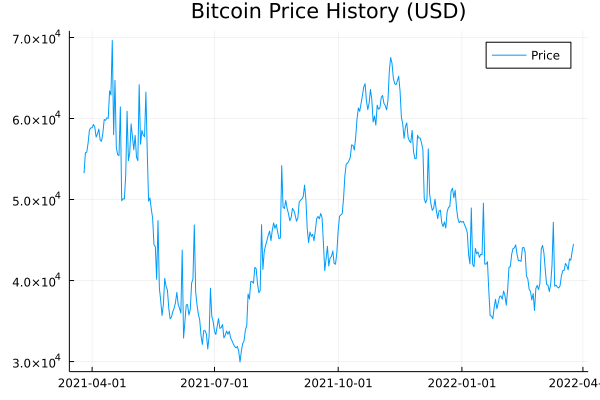

In [23]:
dfb = vcat(last(df, 358), dfnw)
plot(dfb.Date, dfb.Price, title="Bitcoin Price History (USD)", label="Price")

We load the three commodities' data and visualize them.

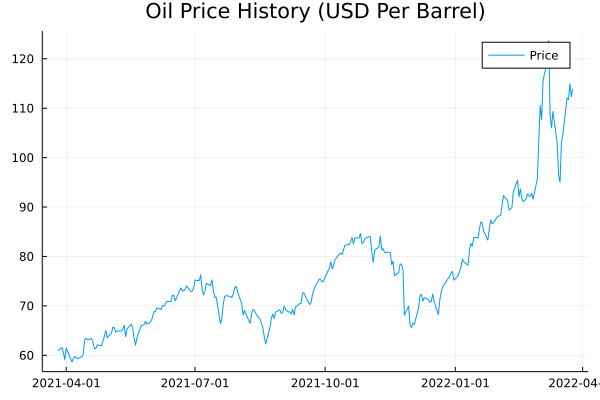

In [24]:
dfo = CSV.read("data/Oil.csv", DataFrame)
plot(dfo.Date, dfo.Price, title="Oil Price History (USD Per Barrel)", label="Price")

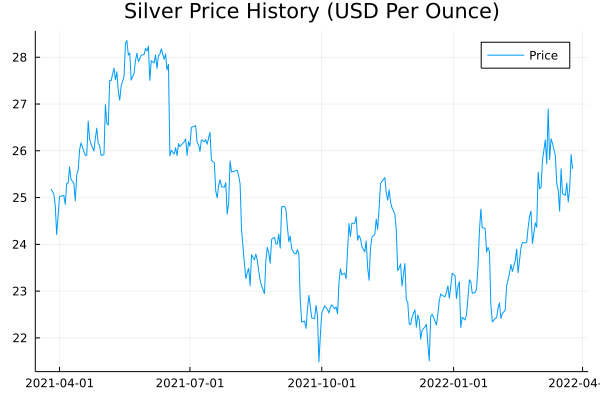

In [25]:
dfs = CSV.read("data/Silver.csv", DataFrame)
plot(dfs.Date, dfs.Price, title="Silver Price History (USD Per Ounce)", label="Price")

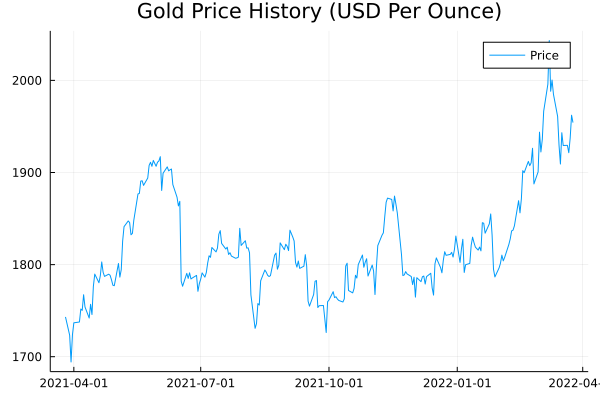

In [26]:
dfg = CSV.read("data/Gold.csv", DataFrame)
plot(dfg.Date, dfg.Price, title="Gold Price History (USD Per Ounce)", label="Price")

---

With these values loaded, we can start building our design matrix and calculate our solution vector.

In [27]:
b = dfb.Price
A = [ones(365,1) dfo.Price dfs.Price dfg.Price]
xHat = A\b

4-element Vector{Float64}:
 143344.92404856317
    -38.13561706264519
   -415.89130504372423
    -45.67017572635481

This function will show how accurate our model is.

In [28]:
yHat(x) = xHat'*[1, dfo.Price[x], dfs.Price[x], dfg.Price[x]];

As we can see, there is no clear relation between the commodities and bitcoin, at the very least on the simple linear model we chose.

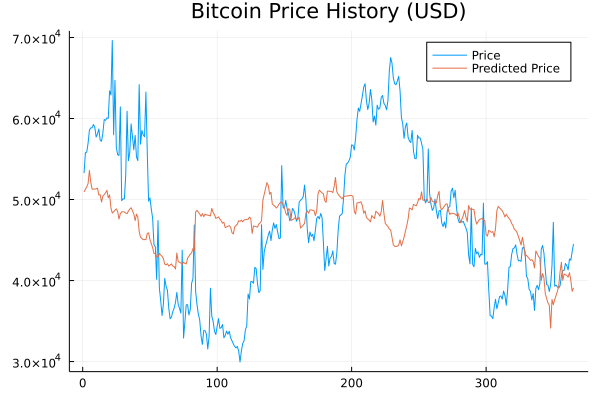

In [29]:
plot(dfb.Price, title="Bitcoin Price History (USD)", label="Price")
plot!(yHat.(1:365), label="Predicted Price")